<a href="https://colab.research.google.com/github/WineQualityAnalysis/WineQualityKaggle/blob/main/Ordinal_Regression_with_Tabular_Wine_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.decomposition import PCA

In [2]:
#regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import data set
# train data set
train_ds_org = pd.read_csv('/content/sample_data/train.csv')
#train_ds_org = pd.read_csv('/content/drive/MyDrive/ColabDataset/wine/train.csv')
train_ds = train_ds_org.drop('Id', axis = 1)
x_train = train_ds.drop('quality', axis = 1)
y_train = train_ds['quality']

# test data set
x_test_df1 = pd.read_csv('/content/sample_data/test.csv')
#x_test_df1 = pd.read_csv('/content/drive/MyDrive/ColabDataset/wine/test.csv')
x_test_df = x_test_df1.drop('Id', axis = 1)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [6]:
from sklearn.metrics.pairwise import normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_train = scaler.fit_transform(x_train)
ntrain = pd.DataFrame(normalized_train, columns = x_train.columns)
print(ntrain.head())

normalized_test = scaler.fit_transform(x_test)
ntest = pd.DataFrame(normalized_test, columns = x_test.columns)
print(ntest.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.174312          0.271429     0.013158        0.117188   0.115789   
1       0.532110          0.071429     0.631579        0.070312   0.155263   
2       0.458716          0.000000     0.644737        0.046875   0.097368   
3       0.449541          0.150000     0.407895        0.218750   0.118421   
4       0.348624          0.228571     0.750000        0.117188   0.450000   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.373134              0.085106  0.606130  0.766667   0.096154   
1             0.074627              0.042553  0.263602  0.488889   0.121795   
2             0.074627              0.039007  0.671264  0.377778   0.217949   
3             0.044776              0.028369  0.609962  0.577778   0.141026   
4             0.164179              0.262411  0.449042  0.455556   0.346154   

    alcohol  
0  0.377358  
1  0.773585  
2  0.094340  


In [7]:
train_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [8]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
184,6.6,0.630,0.10,1.9,0.071,45.0,87.0,0.99525,3.46,0.68,10.2
1724,8.0,0.400,0.27,2.7,0.058,10.0,21.0,0.99498,3.22,0.68,12.2
251,7.9,0.310,0.27,1.9,0.058,16.0,36.0,0.99396,3.17,0.40,11.4
1121,8.0,0.470,0.30,1.6,0.067,20.0,110.0,0.99900,3.20,1.17,9.4
1486,7.2,0.705,0.13,6.7,0.076,11.0,25.0,0.99538,3.51,0.93,11.4


In [9]:
y_test.head()

184     6
1724    7
251     6
1121    5
1486    7
Name: quality, dtype: int64

In [10]:
# Shape of data sets
print(f"Shape of train data set is {train_ds.shape}")
print(f"Shape of test data set is {x_test.shape}")

Shape of train data set is (2056, 12)
Shape of test data set is (514, 11)


In [11]:
# Missing data
train_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

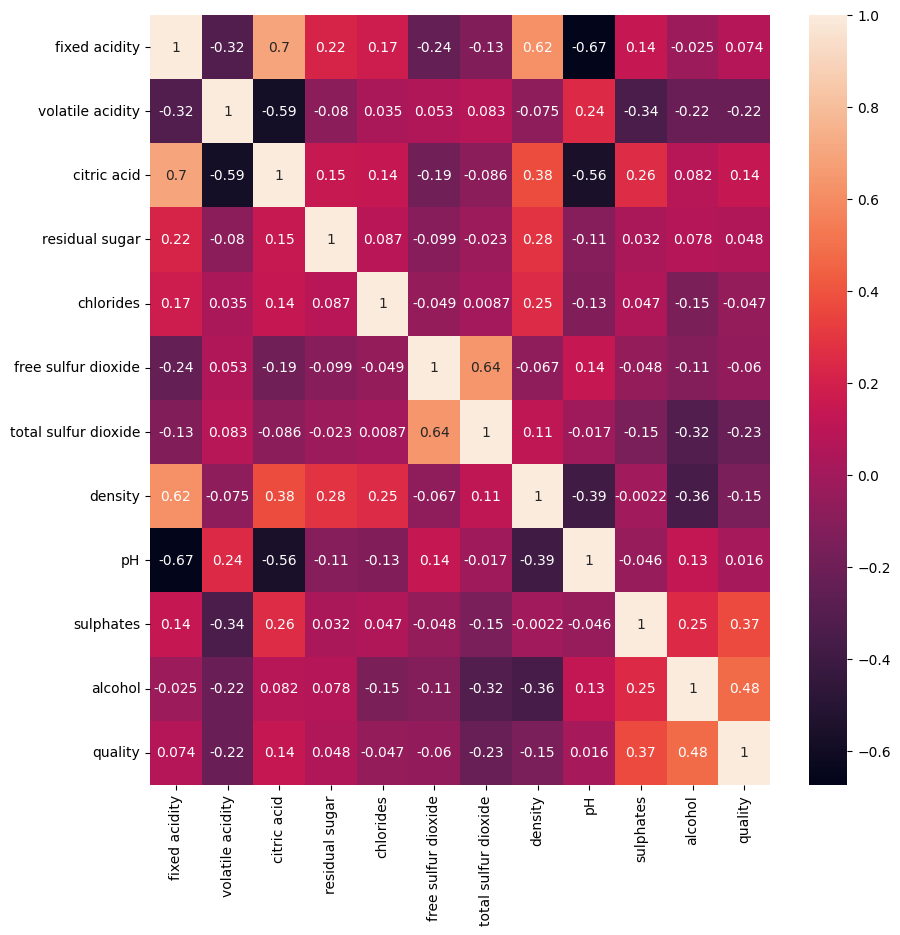

In [12]:
# Correlation
plt.figure(figsize=(10,10))
sns.heatmap(train_ds.corr(),annot=True)

In [13]:
# Outliers
col_name = train_ds.columns.tolist()
col_name

# for i in range(len(col_name)):
#     plt.boxplot(train_ds[col_name[i]])
#     plt.show()



['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<Figure size 2000x1000 with 0 Axes>

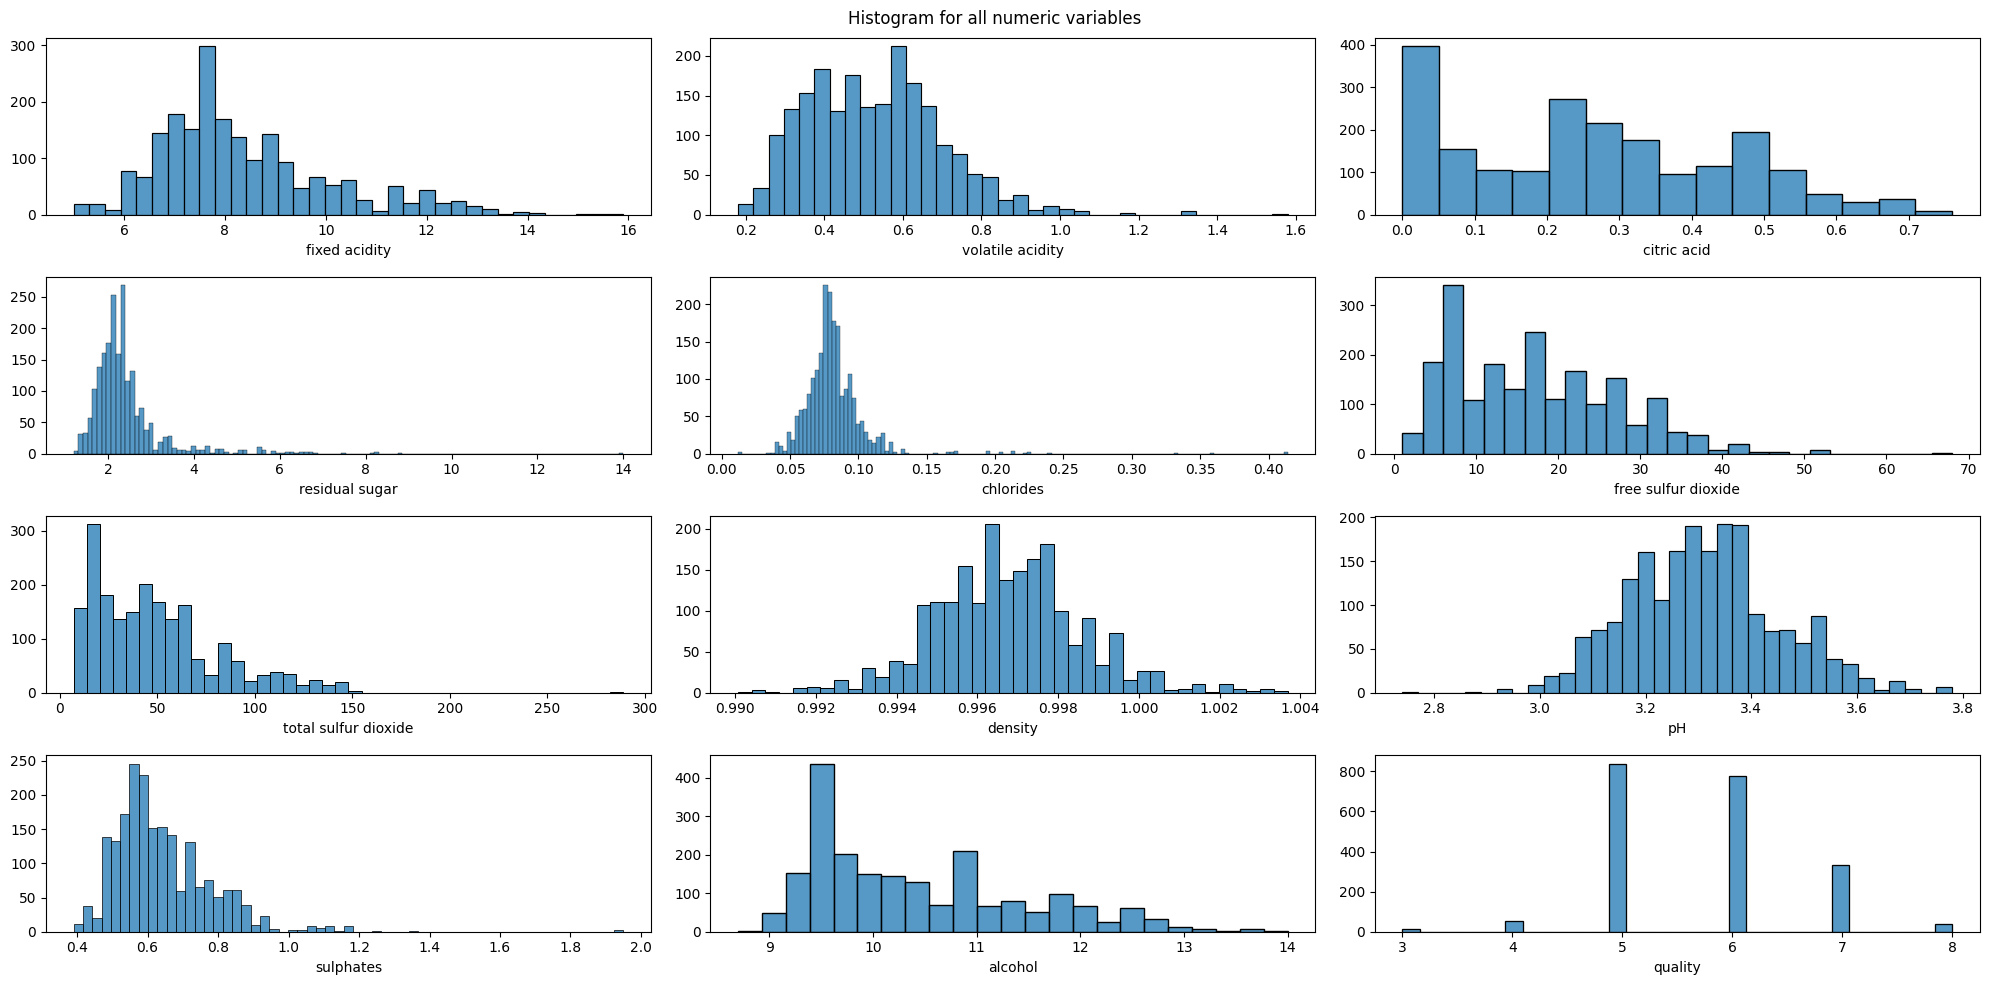

In [14]:
#Distribution of each feature#
fig = plt.figure(figsize = [20,10])
col = train_ds_org.columns
#print(col)
fig, axs = plt.subplots(4, 3, figsize=(20, 10))

sns.histplot(x = 'fixed acidity', data = train_ds_org, ax = axs[0,0])
sns.histplot(x = 'volatile acidity', data = train_ds_org, ax = axs[0,1])
sns.histplot(x = 'citric acid', data = train_ds_org, ax = axs[0,2])
sns.histplot(x = 'residual sugar', data = train_ds_org,  ax = axs[1,0])
sns.histplot(x = 'chlorides', data = train_ds_org,  ax = axs[1,1])
sns.histplot(x = 'free sulfur dioxide', data = train_ds_org,  ax = axs[1,2])
sns.histplot(x = 'total sulfur dioxide', data = train_ds_org,  ax = axs[2,0])
sns.histplot(x = 'density', data = train_ds_org,  ax = axs[2,1])
sns.histplot(x = 'pH', data = train_ds_org,  ax = axs[2,2])
sns.histplot(x = 'sulphates', data = train_ds_org,  ax = axs[3,0])
sns.histplot(x = 'alcohol', data = train_ds_org,  ax = axs[3,1])
sns.histplot(x = 'quality', data = train_ds_org,  ax = axs[3,2])

axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[0, 2].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')
axs[1, 2].set(ylabel='')
axs[2, 0].set(ylabel='')
axs[2, 1].set(ylabel='')
axs[2, 2].set(ylabel='')
axs[3, 0].set(ylabel='')
axs[3, 1].set(ylabel='')
axs[3, 2].set(ylabel='')

fig.suptitle('Histogram for all numeric variables')
plt.tight_layout()
plt.show()


#g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)

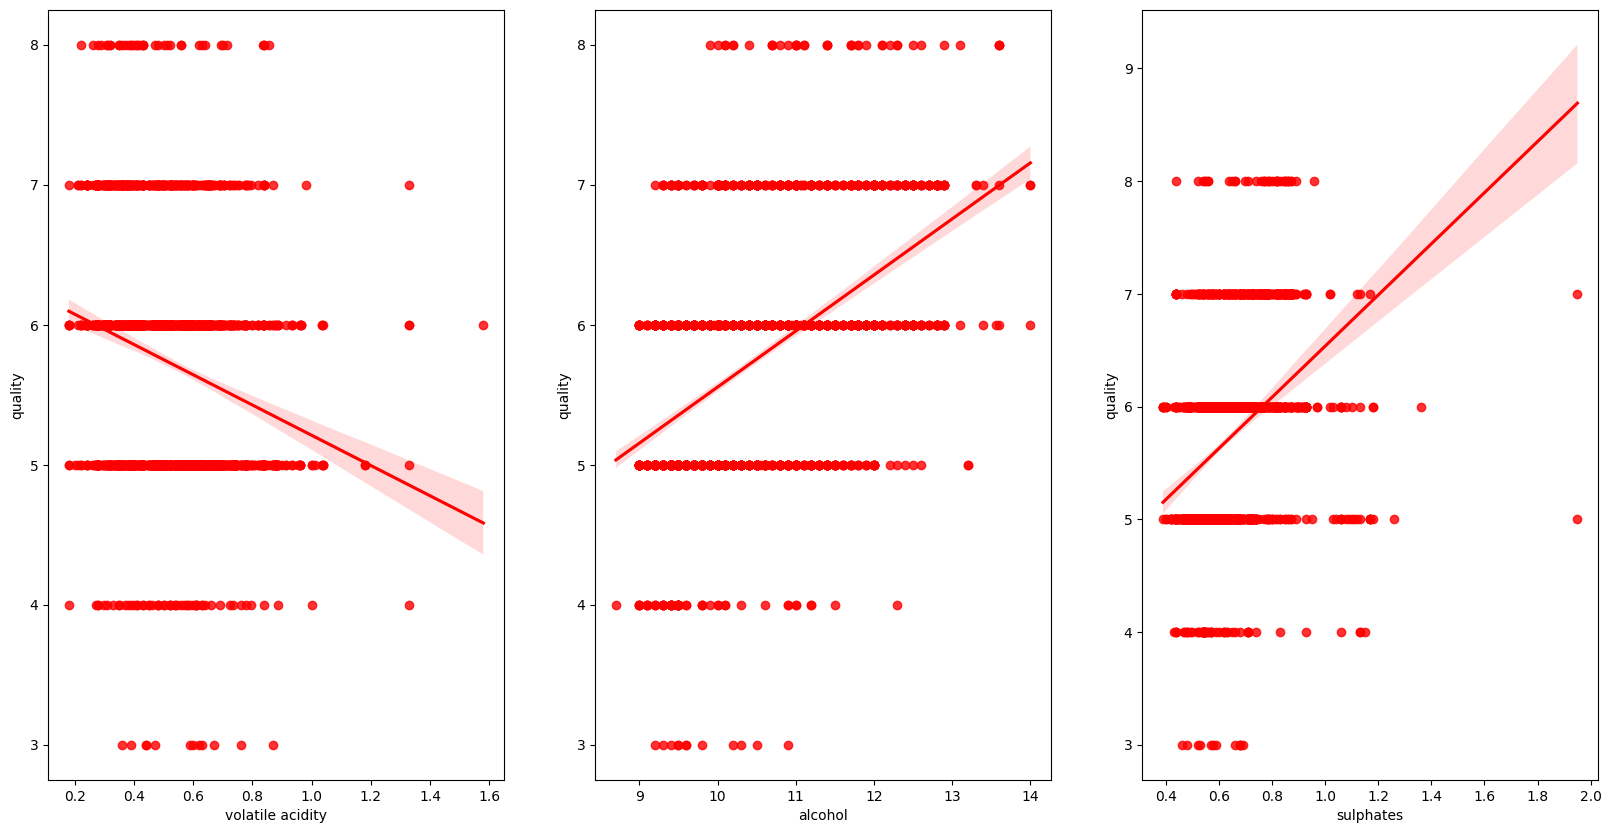

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
cols=["volatile acidity","alcohol","sulphates"]
data = train_ds_org[cols]
for col,ax in zip(cols,axs.flat):
    sns.regplot(x = train_ds_org[col] , y=train_ds_org["quality"] ,color='red',ax=ax)


In [16]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))

d={'Algorithms':model_names,'Accuracy':acc}

acc_frame=pd.DataFrame(d)
acc_frame

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Algorithms,Accuracy
0,LogisticRegression,0.533074
1,LinearSVM,0.356031
2,rbfSVM,0.459144
3,KNearestNeighbors,0.439689
4,RandomForestClassifier,0.560311
5,DecisionTree,0.466926
6,GaussianNB,0.550584


In [17]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))

    acc_frame[name_scaler]=np.array(acc_sc)


In [18]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [19]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(train_ds)
    scaled_df=scaler.transform(train_ds)
    X=scaled_df[:,:11]
    Y=train_ds['quality'].values
    print(X.shape)
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])






(2056, 11)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(2056, 11)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


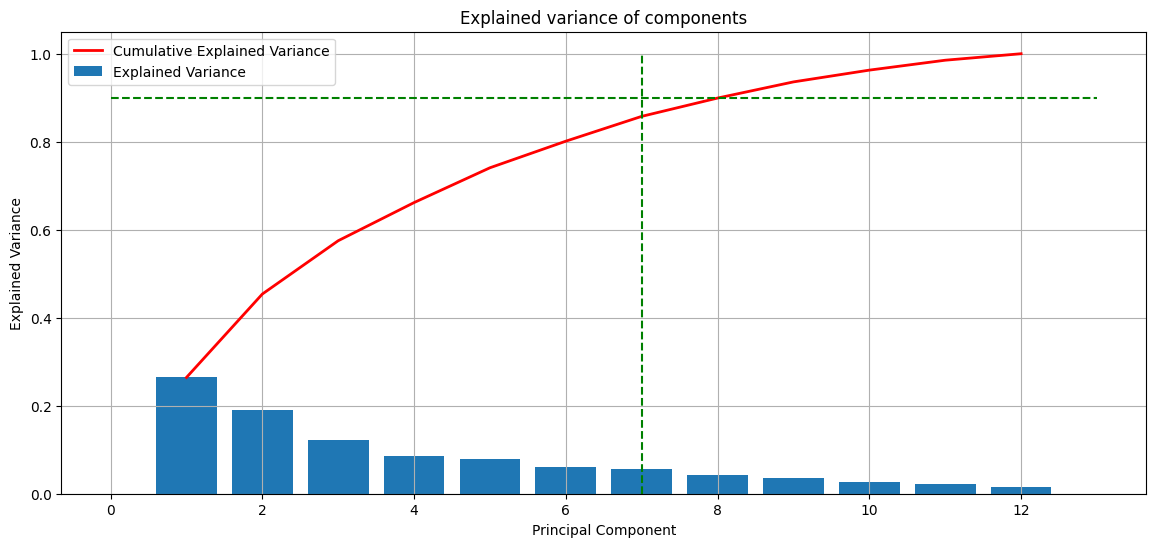

In [20]:
df_pca = PCA().fit(scaled_df)
fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, df_pca.n_components_+1)
ax.bar(x_values, df_pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(df_pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,df_pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([7,7],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()


In [21]:

acc_frame

,Algorithms,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.533074,0.550584,0.558366
1,LinearSVM,0.356031,0.542802,0.544747
2,rbfSVM,0.459144,0.536965,0.554475
3,KNearestNeighbors,0.439689,0.503891,0.513619
4,RandomForestClassifier,0.560311,0.536965,0.558366
5,DecisionTree,0.466926,0.480545,0.478599
6,GaussianNB,0.550584,0.546693,0.546693


In [22]:
## StandardScaler as it gave better resluts.
## testing data with Linear regression ##

from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring='accuracy')
logreg_cv.fit(x_train,y_train)
#pred_new=logreg_cv.predict(x_test)
#print("ACCURACY" ,accuracy_score(pred_new,y_test))

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.5765395894428152


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

pred_prob (514, 6)
[[1.67411494e-03 3.14185521e-02 4.16190728e-01 3.98415502e-01
  1.47185513e-01 5.11558965e-03]
 [1.16607939e-04 1.55272254e-03 5.13114595e-02 5.44195200e-01
  3.62325357e-01 4.04986528e-02]
 [9.54409450e-04 7.18852340e-03 2.75277872e-01 5.81051651e-01
  1.30848655e-01 4.67888950e-03]
 [2.78146728e-03 3.72398978e-02 2.12157623e-01 4.77486094e-01
  1.94810206e-01 7.55247117e-02]
 [2.76069979e-05 6.43990164e-03 5.71670452e-02 2.54980537e-01
  6.30365216e-01 5.10196932e-02]]
tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.5765395894428152
Accuracy = 55.60000000000001%
F1 Score = 53.1%

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.71      0.67       211
           6       0.48      0.61      0.54       191
           7       0.53      0.23      0.32        90
       

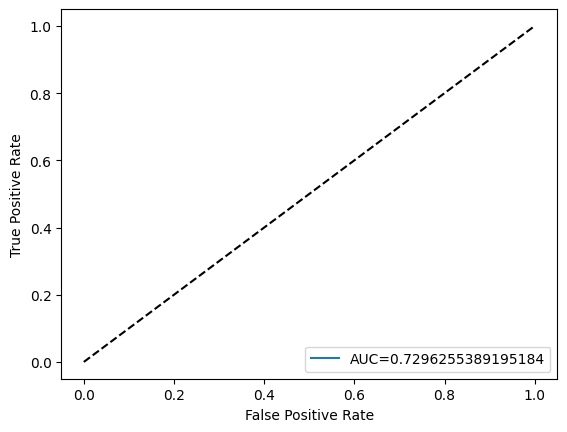

Predicted,5,6,7
Actual,,,
3,0,2,0
4,7,4,0
5,149,58,4
6,62,116,13
7,15,54,21
8,1,6,2


In [47]:
## StandardScaler - it gave better resluts.
## testing data with Linear regression ##
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring='accuracy')
logreg_cv.fit(x_train,y_train)
pred_new=logreg_cv.predict(x_test)
pred_prob=logreg_cv.predict_proba(x_test)
pred_prob1=logreg_cv.predict_proba(x_test)[:,0]
print("pred_prob" ,pred_prob.shape)

print(pred_prob[:5])
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
print('F1 Score = {}%'.format(round(f1_score(y_test, pred_new, average='weighted'),3)*100))
#print('roc_auc_score = {}%'.format(round(roc_auc_score(y_test, pred_prob,  multi_class='ovr'),3)*100 [:, 0]))

print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred_new))

#create AUC curve
#define metrics
fpr, tpr, thresholds  = roc_curve(y_test, pred_prob1, pos_label=1)
auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


confusion_matrix(y_test,pred_new)
pd.crosstab(y_test, pred_new, rownames = ['Actual'], colnames =['Predicted'])

In [24]:
## creating model with best parameters {'C': 10.0, 'penalty': 'l2'} and predicting with test.csv data##

## creating submission file with test prediction ##

logreg2=LogisticRegression(C=10.0,penalty="l2")
logreg2.fit(x_train,y_train)
#y_pred = logreg2.predict(x_test)
#print("score",accuracy_score(y_pred,y_test))

# Make predictions on the testing data
y_pred = logreg2.predict(x_test_df)

# Calculate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

submission = pd.DataFrame({'Id': x_test_df1['Id'], 'quality': y_pred})
submission.head()


submission.to_csv('sample_submission_logistic.csv', index=False)
from google.colab import files
files.download("sample_submission_logistic.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
def shaply(Mode):
  explainer = shap.LinearExplainer(Mode, x_train)
  values = explainer.shap_values(x_train)
  plt.title(Mode)
  shap.summary_plot(values, x_train)

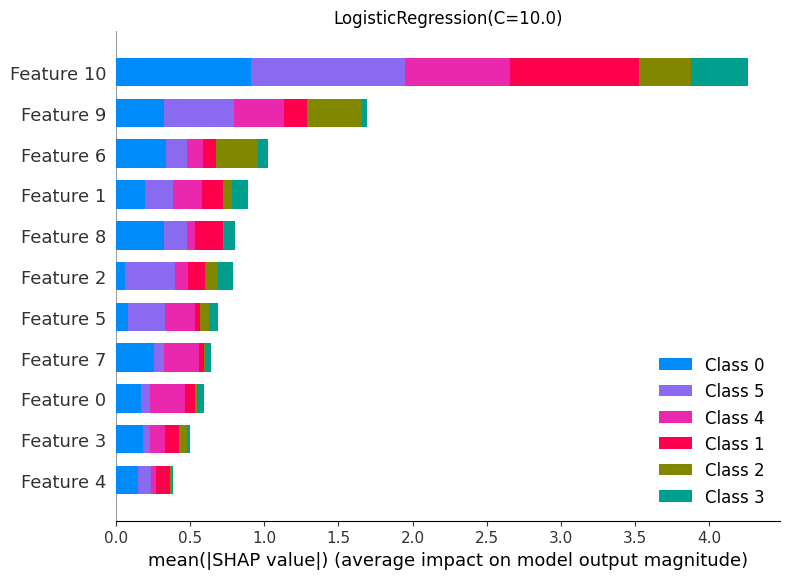

In [27]:
shaply(logreg2)

Random Forest

In [28]:
##Testing the data with Random Forest Classifier defined above

dictionary={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
#finding the optimal parameter values from a given set of parameters in a grid
rand_fc=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=dictionary,scoring='accuracy',cv=10)
#Fitting the dataset to RF grid search
rand_fc.fit(x_train,y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

pred_p (514, 6)
[[0.058 0.028 0.284 0.512 0.114 0.004]
 [0.004 0.004 0.08  0.58  0.326 0.006]
 [0.    0.014 0.368 0.45  0.154 0.014]
 [0.014 0.088 0.52  0.296 0.082 0.   ]
 [0.    0.008 0.102 0.312 0.434 0.144]]
tuned hpyerparameters :(best parameters)  {'max_features': 'sqrt', 'n_estimators': 500}
accuracy : 0.5875994972769166
Accuracy = 55.1%
F1 Score = 53.6%

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.64      0.68      0.66       211
           6       0.48      0.62      0.54       191
           7       0.56      0.28      0.37        90
           8       0.00      0.00      0.00         9

    accuracy                           0.56       514
   macro avg       0.28      0.26      0.26       514
weighted avg       0.54      0.56      0.54       514



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
No positive samples in y_true, true positive value should be meaningless


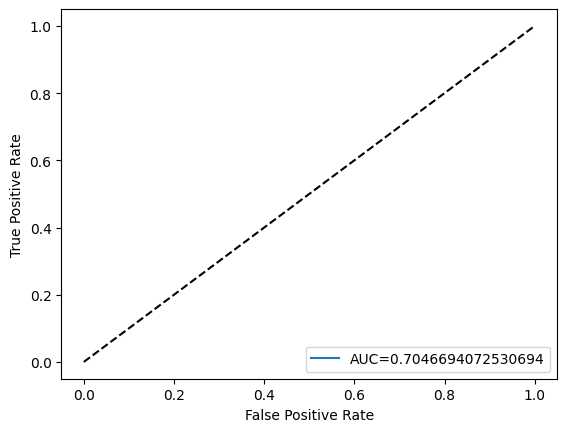

In [29]:
pred_n=rand_fc.predict(x_test)
pred_p=rand_fc.predict_proba(x_test)
pred_p1=rand_fc.predict_proba(x_test)[:,0]
print("pred_p" ,pred_p.shape)

print(pred_p[:5])
print("tuned hpyerparameters :(best parameters) ",rand_fc.best_params_)
print("accuracy :",rand_fc.best_score_)

confusion_matrix(y_test,pred_n)
pd.crosstab(y_test, pred_n, rownames = ['Actual'], colnames =['Predicted'])

print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
print('F1 Score = {}%'.format(round(f1_score(y_test, pred_n, average='weighted'),3)*100))
#print('roc_auc_score = {}%'.format(round(roc_auc_score(y_test, pred_prob,  multi_class='ovr'),3)*100 [:, 0]))

print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred_n))

#create AUC curve
#define metrics
fpr, tpr, thresholds  = roc_curve(y_test, pred_p1, pos_label=1)
auc = roc_auc_score(y_test, pred_p, multi_class='ovo')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [30]:
# Finding the best Score ,complete results and best parameters for the RF model
rand_fc.best_score_

0.5875994972769166

In [31]:
rand_fc.cv_results_

{'mean_fit_time': array([2.04896924, 2.07117724, 1.85235698]),
 'std_fit_time': array([0.59166167, 0.53447136, 0.38701913]),
 'mean_score_time': array([0.13268168, 0.13052752, 0.12196972]),
 'std_score_time': array([0.016671  , 0.02182626, 0.01490854]),
 'param_max_features': masked_array(data=['auto', 'sqrt', 'log2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 500, 500],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 500},
  {'max_features': 'sqrt', 'n_estimators': 500},
  {'max_features': 'log2', 'n_estimators': 500}],
 'split0_test_score': array([0.60645161, 0.61935484, 0.6       ]),
 'split1_test_score': array([0.49677419, 0.47741935, 0.47741935]),
 'split2_test_score': array([0.56493506, 0.57792208, 0.59090909]),
 'split3_test_score': array([0.57142857, 0.57142857, 0.57792208]),
 'split

In [32]:
rand_fc.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [33]:
Rand_f1=RandomForestClassifier(max_features = 'sqrt', n_estimators = 500)
Rand_f1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

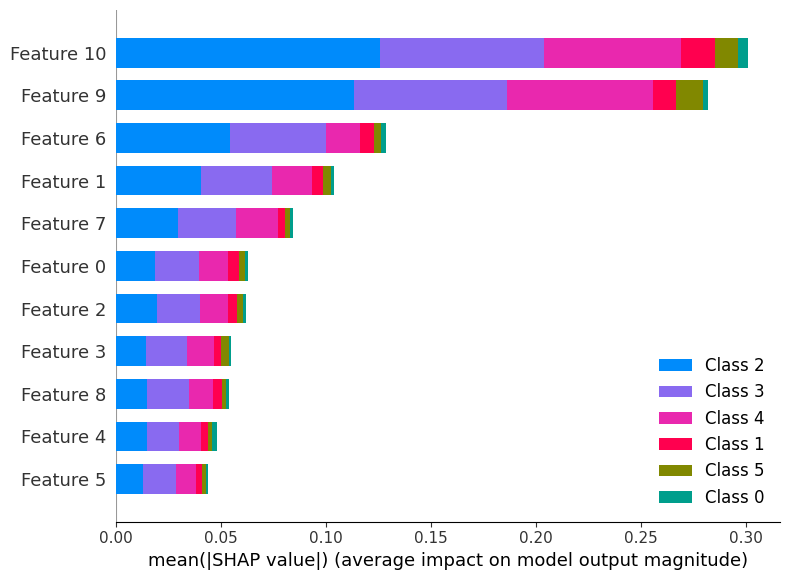

In [34]:
# compute SHAP values

explainer = shap.TreeExplainer(Rand_f1)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train)


In [35]:
#making the prediction for test data
pred=Rand_f1.predict(x_test)
accur=accuracy_score(pred,y_test)
#print(accur)
predicted_df = {'predicted_values': pred, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(5)

,predicted_values,original_values
0,6,6
1,6,7
2,6,6
3,5,5
4,7,7


In [36]:
#Finding the quality for test data given
test_predict=rand_fc.predict(x_test_df)

X has feature names, but RandomForestClassifier was fitted without feature names


In [37]:
# Prepare the Kaggle submission file|
submission = pd.DataFrame({'Id': x_test_df1['Id'], 'predict': test_predict})
submission.head()

,Id,predict
0,2056,7
1,2057,7
2,2058,7
3,2059,7
4,2060,7


In [38]:
submission.to_csv('submission_Random_Forest.csv', index=False)

In [39]:
from google.colab import files
files.download('submission_Random_Forest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Initialize and train the SVM model
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5408560311284046


Liblinear failed to converge, increase the number of iterations.


In [41]:
from sklearn.model_selection import GridSearchCV
# Initialize the SVM model
svm_model = LinearSVC()
param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C
    'max_iter': [1000, 2000, 3000]  # Maximum number of iterations
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train,y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to conve

Best Hyperparameters: {'C': 10, 'max_iter': 3000}
Accuracy: 0.546692607003891


Liblinear failed to converge, increase the number of iterations.


## Gaussian Model

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [43]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel = kernel)

In [44]:
# x_train,x_test,y_train,y_test
gpc.fit(x_train,y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [45]:
y_pred = gpc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5505836575875487


END